In [37]:
import pip
from warnings import filterwarnings
filterwarnings("ignore")
def import_or_install(package:str):
    try:
        __import__(package)
        return 'Found'
    except ImportError:
        pip.main(['install', package]) 
        return 'Installed'
    
packages = ['pandas', 'tqdm', 'numpy','psutil', 'statsmodels']
[import_or_install(i) for i in packages]

#filter harmless warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
#configure dataframe display options
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_colwidth',None)
pd.set_option('mode.chained_assignment', None)

In [38]:
import pip
from warnings import filterwarnings
filterwarnings("ignore")
def import_or_install(package:str):
    try:
        __import__(package)
        return 'Found'
    except ImportError:
        pip.main(['install', package]) 
        return 'Installed'
    
packages = ['pandas', 'tqdm', 'numpy','psutil', 'statsmodels']
[import_or_install(i) for i in packages]

#filter harmless warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
#configure dataframe display options
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_colwidth',None)
pd.set_option('mode.chained_assignment', None)

from watermark import watermark
print(watermark())
print(watermark(iversions=True, globals_=globals()))

Last updated: 2024-03-28T18:49:52.615379-07:00

Python implementation: CPython
Python version       : 3.10.13
IPython version      : 8.15.0

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 23.2.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

pandas    : 2.0.3
pip       : 23.2.1
numpy     : 1.24.3
matplotlib: 3.7.2
yfinance  : 0.2.36



In [39]:
import pandas as pd
from prophet import Prophet

# Load the CSV file into a DataFrame
all_data = pd.read_csv('stock_data.csv')

# Display the DataFrame to verify it has been imported correctly
all_data

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2013-04-01,21.670000,21.700001,21.320000,21.430000,15.651334,33718100,INTC
1,2013-04-02,21.520000,21.580000,21.320000,21.459999,15.673239,28166700,INTC
2,2013-04-03,21.450001,21.500000,21.010000,21.049999,15.373801,36620800,INTC
3,2013-04-04,21.049999,21.190001,20.959999,21.139999,15.439535,28702500,INTC
4,2013-04-05,20.940001,20.969999,20.750000,20.940001,15.293467,36721600,INTC
...,...,...,...,...,...,...,...,...
10063,2023-03-22,143.600006,147.416672,142.133331,142.169998,138.068573,3313200,SOXX
10064,2023-03-23,144.276672,147.630005,143.133331,145.676666,142.548950,4039800,SOXX
10065,2023-03-24,144.496674,144.889999,141.699997,143.149994,140.076523,3120600,SOXX
10066,2023-03-27,143.666672,144.106674,140.973328,141.470001,138.432602,1806300,SOXX


In [40]:
all_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Ticker'],
      dtype='object')

In [41]:
unique_tickers = all_data['Ticker'].unique()
print(unique_tickers)

['INTC' 'AMD' 'NVDA' 'SOXX']


In [42]:
import yfinance as yf

# Ticker symbol for AMD
soxx_symbol = 'SOXX'

# Fetch SOXX ETF data for the past 11 years
soxx_data = yf.download(soxx_symbol, period='11y')

soxx_data.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-22,224.160004,227.100006,223.449997,225.449997,225.449997,2658100
2024-03-25,222.250000,226.610001,221.710007,224.570007,224.570007,2283500
2024-03-26,226.190002,226.880005,222.830002,222.880005,222.880005,4414200
2024-03-27,225.389999,225.759995,221.399994,225.679993,225.679993,4161700
2024-03-28,225.419998,227.000000,224.910004,225.919998,225.919998,1793400


[*********************100%%**********************]  1 of 1 completed


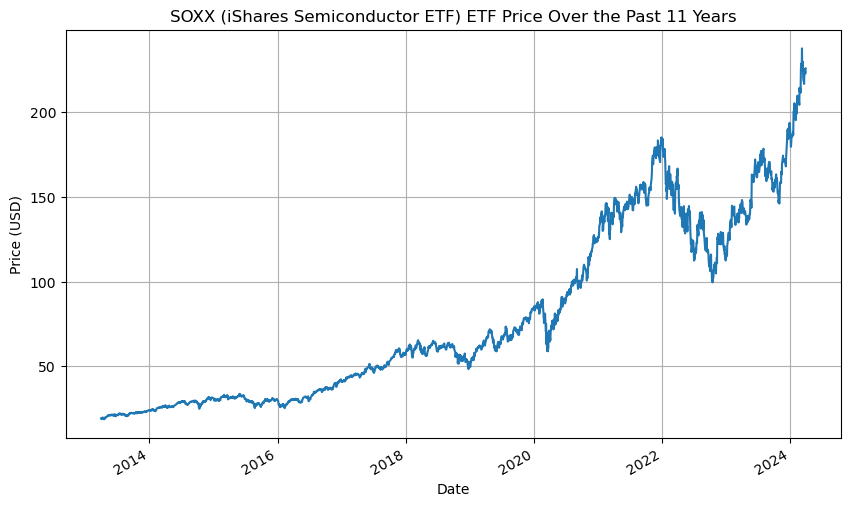

In [43]:
import matplotlib.pyplot as plt

# Ticker symbol for SOXX ETF
soxx_symbol = 'SOXX'

# Fetch SOXX ETF data for the past 11 years
amd_data = yf.download(soxx_symbol, period='11y')

# Plot the 'Close' price
plt.figure(figsize=(10, 6))
soxx_data['Close'].plot()
plt.title('SOXX (iShares Semiconductor ETF) ETF Price Over the Past 11 Years')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

In [44]:
# Filter the data for SOXX
soxx_data = all_data[all_data['Ticker'] == 'SOXX']

# Prophet expects the 'Date' and 'Close' columns
soxx_data = soxx_data[['Date', 'Close']]
soxx_data.columns = ['ds', 'y']  # Renaming columns for Prophet

# Create a Prophet model for SOXX
model_soxx = Prophet()

# Fit the model
model_soxx.fit(soxx_data)

# Make a future dataframe for one year past the last available date
future_soxx = model_soxx.make_future_dataframe(periods=365)

# Forecast
forecast_soxx= model_soxx.predict(future_soxx)

# Print the forecast
forecast_soxx[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

18:49:53 - cmdstanpy - INFO - Chain [1] start processing
18:49:53 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
2877,2024-03-23,113.648300,98.254109,129.974575
2878,2024-03-24,113.626085,97.654799,131.088253
2879,2024-03-25,114.352646,99.090199,132.683203
2880,2024-03-26,114.318088,97.800032,132.594969
2881,2024-03-27,114.239937,98.079287,132.552171


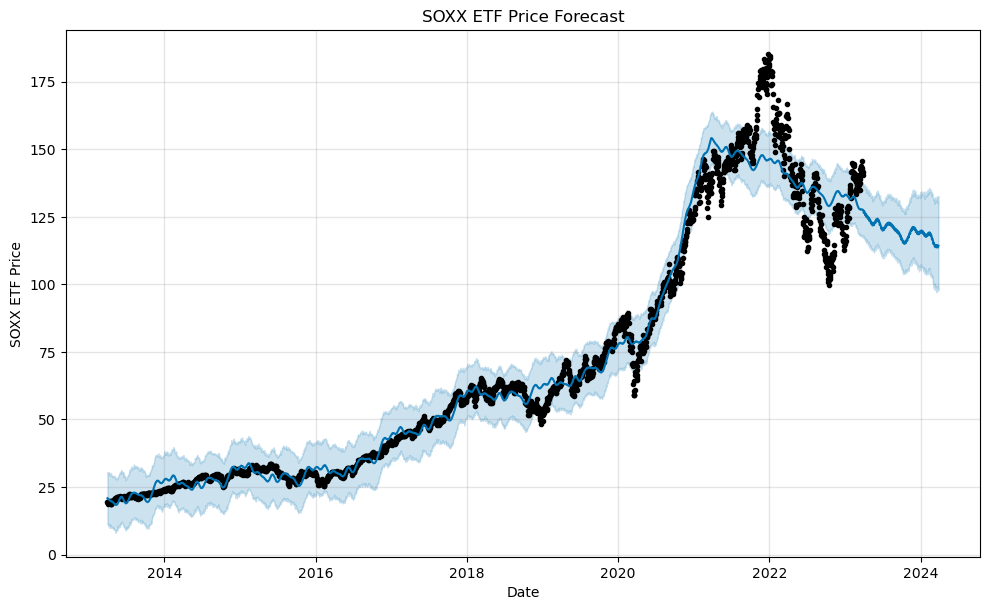

In [45]:
import matplotlib.pyplot as plt

# Plot the forecast for AMD
fig_soxx = model_soxx.plot(forecast_soxx)
plt.xlabel('Date')
plt.ylabel('SOXX ETF Price')
plt.title('SOXX ETF Price Forecast')
plt.show()

[*********************100%%**********************]  1 of 1 completed


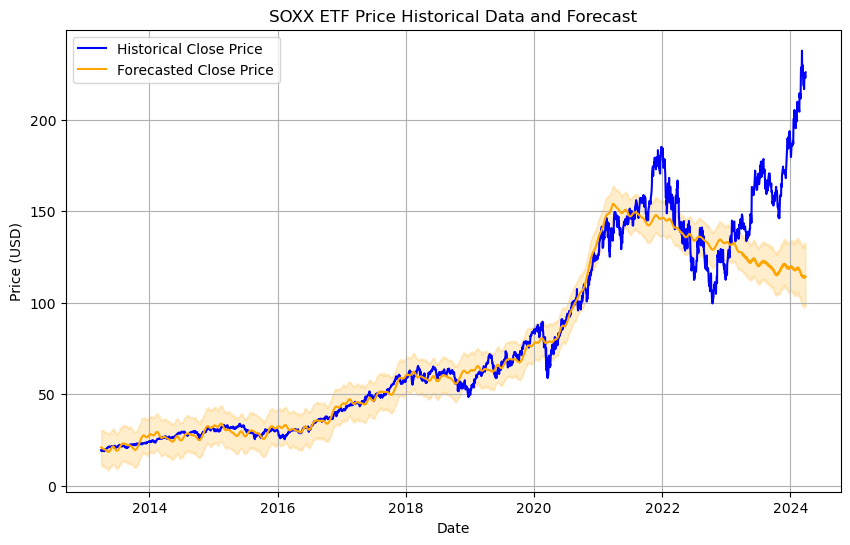

In [46]:
# Ticker symbol for SOXX
soxx_symbol = 'SOXX'

# Fetch SOXX stock data for the past 11 years
soxx_data = yf.download(soxx_symbol, period='11y')

# Plot both historical data and forecast for SOXX
plt.figure(figsize=(10, 6))

# Plot historical data for SOXX
plt.plot(soxx_data.index, soxx_data['Close'], label='Historical Close Price', color='blue')

# Plot forecast for SOXX
plt.plot(forecast_soxx['ds'], forecast_soxx['yhat'], label='Forecasted Close Price', color='orange')
plt.fill_between(forecast_soxx['ds'], forecast_soxx['yhat_lower'], forecast_soxx['yhat_upper'], color='orange', alpha=0.2)

plt.title('SOXX ETF Price Historical Data and Forecast')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

In [47]:
# Calculate the percentage change of daily returns for SOXX
daily_returns_soxx = soxx_data['Adj Close'].pct_change()

# Drop the first row since it will have NaN value as there is no previous day for the first day
daily_returns_soxx = daily_returns_soxx.dropna()

# Convert the series of daily returns into a DataFrame for SOXX
daily_returns_df_soxx = pd.DataFrame({'Daily_Returns_SOXX': daily_returns_soxx})

# Display the DataFrame for SOXX
daily_returns_df_soxx

,Daily_Returns_SOXX
Date,
2013-04-02,-0.008793
2013-04-03,-0.020178
2013-04-04,0.013137
2013-04-05,-0.005257
2013-04-08,0.012155
...,...
2024-03-22,0.001199
2024-03-25,-0.003903
2024-03-26,-0.007526


In [48]:
# Reset the index of the DataFrame for SOXX
daily_returns_df_soxx = daily_returns_df_soxx.reset_index()

# Display the DataFrame for SOXX with reset index
daily_returns_df_soxx

,Date,Daily_Returns_SOXX
0,2013-04-02,-0.008793
1,2013-04-03,-0.020178
2,2013-04-04,0.013137
3,2013-04-05,-0.005257
4,2013-04-08,0.012155
...,...,...
2763,2024-03-22,0.001199
2764,2024-03-25,-0.003903
2765,2024-03-26,-0.007526
2766,2024-03-27,0.012563


In [49]:
# Save the DataFrame to a CSV file
daily_returns_df_soxx.to_csv('daily_returns_nvidia.csv', index=False)

In [50]:
daily_returns_df_soxx.columns

Index(['Date', 'Daily_Returns_SOXX'], dtype='object')

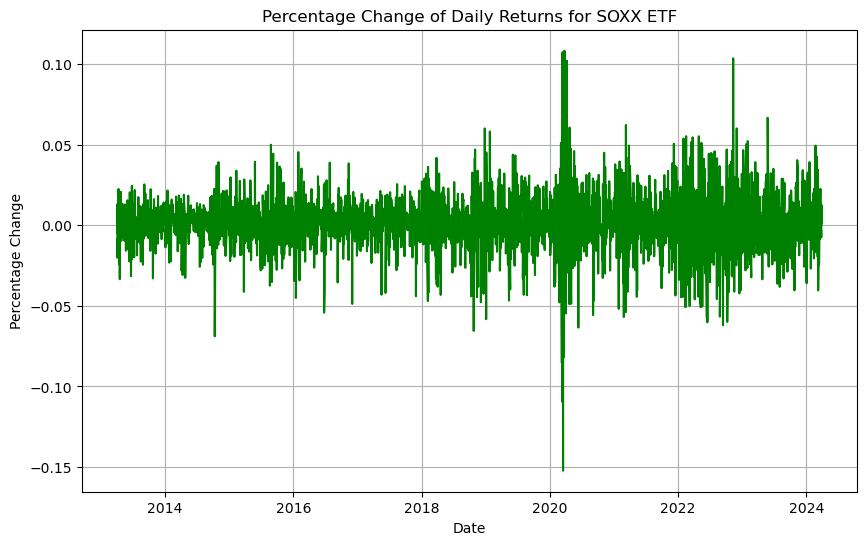

In [51]:
import matplotlib.pyplot as plt

# Calculate the percentage change of daily returns for SOXX
daily_returns_soxx = soxx_data['Adj Close'].pct_change()

# Drop the first row since it will have NaN value as there is no previous day for the first day
daily_returns_soxx = daily_returns_soxx.dropna()

# Plot the percentage change of daily returns for SOXX
plt.figure(figsize=(10, 6))
plt.plot(daily_returns_soxx.index, daily_returns_soxx.values, color='green')
plt.title('Percentage Change of Daily Returns for SOXX ETF')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.grid(True)
plt.show()

In [52]:
daily_returns_soxx = daily_returns_soxx.to_frame().reset_index()

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from tsfresh import extract_features

# Rename columns as required by tsfresh
daily_returns_soxx.columns = ['time', 'value']

# Extract features using tsfresh
extracted_features = extract_features(daily_returns_soxx, column_id='time')

# Display the extracted features
extracted_features


Feature Extraction: 100%|██████████| 20/20 [00:11<00:00,  1.74it/s]


,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,value__median,value__mean,value__length,value__standard_deviation,value__variation_coefficient,value__variance,value__skewness,value__kurtosis,value__root_mean_square,value__absolute_sum_of_changes,value__longest_strike_below_mean,value__longest_strike_above_mean,value__count_above_mean,value__count_below_mean,value__last_location_of_maximum,value__first_location_of_maximum,value__last_location_of_minimum,value__first_location_of_minimum,value__percentage_of_reoccurring_values_to_all_values,value__percentage_of_reoccurring_datapoints_to_all_datapoints,value__sum_of_reoccurring_values,value__sum_of_reoccurring_data_points,value__ratio_value_number_to_time_series_length,value__sample_entropy,value__maximum,value__absolute_maximum,value__minimum,value__benford_correlation,value__time_reversal_asymmetry_statistic__lag_1,value__time_reversal_asymmetry_statistic__lag_2,value__time_reversal_asymmetry_statistic__lag_3,value__c3__lag_1,value__c3__lag_2,value__c3__lag_3,value__cid_ce__normalize_True,value__cid_ce__normalize_False,value__symmetry_looking__r_0.0,value__symmetry_looking__r_0.05,value__symmetry_looking__r_0.1,value__symmetry_looking__r_0.15000000000000002,value__symmetry_looking__r_0.2,value__symmetry_looking__r_0.25,value__symmetry_looking__r_0.30000000000000004,value__symmetry_looking__r_0.35000000000000003,value__symmetry_looking__r_0.4,value__symmetry_looking__r_0.45,value__symmetry_looking__r_0.5,value__symmetry_looking__r_0.55,value__symmetry_looking__r_0.6000000000000001,value__symmetry_looking__r_0.65,value__symmetry_looking__r_0.7000000000000001,value__symmetry_looking__r_0.75,value__symmetry_looking__r_0.8,value__symmetry_looking__r_0.8500000000000001,value__symmetry_looking__r_0.9,value__symmetry_looking__r_0.9500000000000001,value__large_standard_deviation__r_0.05,value__large_standard_deviation__r_0.1,value__large_standard_deviation__r_0.15000000000000002,value__large_standard_deviation__r_0.2,value__large_standard_deviation__r_0.25,value__large_standard_deviation__r_0.30000000000000004,value__large_standard_deviation__r_0.35000000000000003,value__large_standard_deviation__r_0.4,value__large_standard_deviation__r_0.45,value__large_standard_deviation__r_0.5,value__large_standard_deviation__r_0.55,value__large_standard_deviation__r_0.6000000000000001,value__large_standard_deviation__r_0.65,value__large_standard_deviation__r_0.7000000000000001,value__large_standard_deviation__r_0.75,value__large_standard_deviation__r_0.8,value__large_standard_deviation__r_0.8500000000000001,value__large_standard_deviation__r_0.9,value__large_standard_deviation__r_0.9500000000000001,value__quantile__q_0.1,value__quantile__q_0.2,value__quantile__q_0.3,value__quantile__q_0.4,value__quantile__q_0.6,value__quantile__q_0.7,value__quantile__q_0.8,value__quantile__q_0.9,value__autocorrelation__lag_0,value__autocorrelation__lag_1,value__autocorrelation__lag_2,value__autocorrelation__lag_3,value__autocorrelation__lag_4,value__autocorrelation__lag_5,value__autocorrelation__lag_6,value__autocorrelation__lag_7,value__autocorrelation__lag_8,value__autocorrelation__lag_9,"value__agg_autocorrelation__f_agg_""mean""__maxlag_40","value__agg_autocorrelation__f_agg_""median""__maxlag_40","value__agg_autocorrelation__f_agg_""var""__maxlag_40",value__partial_autocorrelation__lag_0,value__partial_autocorrelation__lag_1,value__partial_autocorrelation__lag_2,value__partial_autocorrelation__lag_3,value__partial_autocorrelation__lag_4,value__partial_autocorrelation__lag_5,value__partial_autocorrelation__lag_6,value__partial_autocorrelation__lag_7,value__partial_autocorrelation__lag_8,value__partial_autocorrelation__lag_9,value__number_cwt_peaks__n_1,value__number_cwt_peaks__n_5,value__number_peaks__n_1,value__number_peaks__n_3

In [54]:
extracted_features.columns

Index(['value__variance_larger_than_standard_deviation',
       'value__has_duplicate_max', 'value__has_duplicate_min',
       'value__has_duplicate', 'value__sum_values', 'value__abs_energy',
       'value__mean_abs_change', 'value__mean_change',
       'value__mean_second_derivative_central', 'value__median',
       ...
       'value__fourier_entropy__bins_5', 'value__fourier_entropy__bins_10',
       'value__fourier_entropy__bins_100',
       'value__permutation_entropy__dimension_3__tau_1',
       'value__permutation_entropy__dimension_4__tau_1',
       'value__permutation_entropy__dimension_5__tau_1',
       'value__permutation_entropy__dimension_6__tau_1',
       'value__permutation_entropy__dimension_7__tau_1',
       'value__query_similarity_count__query_None__threshold_0.0',
       'value__mean_n_absolute_max__number_of_maxima_7'],
      dtype='object', length=783)

In [55]:
# Remove columns with NaN values
relevant_features_cleaned = extracted_features.dropna(axis=1)

# Select columns with non-zero values
relevant_features_cleaned = relevant_features_cleaned.loc[:, (relevant_features_cleaned != 0).any(axis=0)]

# Display the cleaned relevant features
print(relevant_features_cleaned)

            value__sum_values  value__abs_energy  value__median  value__mean  \
2013-04-02          -0.008793           0.000077      -0.008793    -0.008793   
2013-04-03          -0.020178           0.000407      -0.020178    -0.020178   
2013-04-04           0.013137           0.000173       0.013137     0.013137   
2013-04-05          -0.005257           0.000028      -0.005257    -0.005257   
2013-04-08           0.012155           0.000148       0.012155     0.012155   
...                       ...                ...            ...          ...   
2024-03-22           0.001199           0.000001       0.001199     0.001199   
2024-03-25          -0.003903           0.000015      -0.003903    -0.003903   
2024-03-26          -0.007526           0.000057      -0.007526    -0.007526   
2024-03-27           0.012563           0.000158       0.012563     0.012563   
2024-03-28           0.001063           0.000001       0.001063     0.001063   

            value__length  value__root_

In [56]:
relevant_features_cleaned

,value__sum_values,value__abs_energy,value__median,value__mean,value__length,value__root_mean_square,value__last_location_of_maximum,value__last_location_of_minimum,value__ratio_value_number_to_time_series_length,value__maximum,value__absolute_maximum,value__minimum,value__quantile__q_0.1,value__quantile__q_0.2,value__quantile__q_0.3,value__quantile__q_0.4,value__quantile__q_0.6,value__quantile__q_0.7,value__quantile__q_0.8,value__quantile__q_0.9,"value__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)","value__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)","value__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)","value__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)","value__fft_coefficient__attr_""real""__coeff_0","value__fft_coefficient__attr_""abs""__coeff_0","value__fft_coefficient__attr_""angle""__coeff_0",value__value_count__value_0,value__range_count__max_1__min_-1,value__range_count__max_0__min_-1000000000000.0,value__range_count__max_1000000000000.0__min_0,value__count_above__t_0,value__count_below__t_0,value__lempel_ziv_complexity__bins_2,value__lempel_ziv_complexity__bins_3,value__lempel_ziv_complexity__bins_5,value__lempel_ziv_complexity__bins_10,value__lempel_ziv_complexity__bins_100
2013-04-02,-0.008793,0.000077,-0.008793,-0.008793,1.0,0.008793,1.0,1.0,1.0,-0.008793,0.008793,-0.008793,-0.008793,-0.008793,-0.008793,-0.008793,-0.008793,-0.008793,-0.008793,-0.008793,-0.005393,-0.003411,-0.002412,-0.001705,-0.008793,0.008793,180.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2013-04-03,-0.020178,0.000407,-0.020178,-0.020178,1.0,0.020178,1.0,1.0,1.0,-0.020178,0.020178,-0.020178,-0.020178,-0.020178,-0.020178,-0.020178,-0.020178,-0.020178,-0.020178,-0.020178,-0.012375,-0.007827,-0.005534,-0.003913,-0.020178,0.020178,180.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2013-04-04,0.013137,0.000173,0.013137,0.013137,1.0,0.013137,1.0,1.0,1.0,0.013137,0.013137,0.013137,0.013137,0.013137,0.013137,0.013137,0.013137,0.013137,0.013137,0.013137,0.008057,0.005096,0.003603,0.002548,0.013137,0.013137,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2013-04-05,-0.005257,0.000028,-0.005257,-0.005257,1.0,0.005257,1.0,1.0,1.0,-0.005257,0.005257,-0.005257,-0.005257,-0.005257,-0.005257,-0.005257,-0.005257,-0.005257,-0.005257,-0.005257,-0.003224,-0.002039,-0.001442,-0.001020,-0.005257,0.005257,180.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2013-04-08,0.012155,0.000148,0.012155,0.012155,1.0,0.012155,1.0,1.0,1.0,0.012155,0.012155,0.012155,0.012155,0.012155,0.012155,0.012155,0.012155,0.012155,0.012155,0.012155,0.007454,0.004715,0.003334,0.002357,0.012155,0.012155,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-22,0.001199,0.000001,0.001199,0.001199,1.0,0.001199,1.0,1.0,1.0,0.001199,0.001199,0.001199,0.001199,0.001199,0.001199,0.001199,0.001199,0.001199,0.001199,0.001199,0.000735,0.000465,0.000329,0.000233,0.001199,0.001199,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2024-03-25,-0.003903,0.000015,-0.003903,-0.003903,1.0,0.003903,1.0,1.0,1.0,-0.003903,0.003903,-0.003903,-0.003903,-0.003903,-0.003903,-0.003903,-0.003903,-0.003903,-0.003903,-0.003903,-0.002394,-0.001514,-0.001071,-0.000757,-0.003903,0.003903,180.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2024-03-26,-0.007526,0.000057,-0.007526,-0.007526,1.0,0.007526,1.0,1.0,1.0,-0.007526,0.007526,-0.007526,-0.007526,-0.007526,-0.007526,-0.007526,-0.007526,-0.007526,-0.007526,-0.007526,-0.004615,-0.002919,-0.002064,-0.001459,-0.007526,0.007526,180.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2024-03-27,0.012563,0.000158,0.012563,0.012563,1.0,0.012563,1.0,1.0,1.0,0.012563,0.012563,0.012563,0.012563,0.012563,0.012563,0.012563,0.012563,0.012563,0.012563,0.012563,0.007705,0.004873,0.003446,0.002436,0.012563,0.012563,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [57]:
relevant_features_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
value__sum_values,2768.0,0.001196,0.018249,-0.152278,-0.007988,0.001627,0.010593,0.108160
value__abs_energy,2768.0,0.000334,0.000873,0.000000,0.000019,0.000086,0.000325,0.023189
value__median,2768.0,0.001196,0.018249,-0.152278,-0.007988,0.001627,0.010593,0.108160
value__mean,2768.0,0.001196,0.018249,-0.152278,-0.007988,0.001627,0.010593,0.108160
value__length,2768.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
value__root_mean_square,2768.0,0.013063,0.012797,0.000000,0.004363,0.009275,0.018026,0.152278
value__last_location_of_maximum,2768.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
value__last_location_of_minimum,2768.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
value__ratio_value_number_to_time_series_length,2768.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
value__maximum,2768.0,0.001196,0.018249,-0.152278,-0.007988,0.001627,0.010593,0.108160


In [58]:
relevant_features_cleaned.columns

Index(['value__sum_values', 'value__abs_energy', 'value__median',
       'value__mean', 'value__length', 'value__root_mean_square',
       'value__last_location_of_maximum', 'value__last_location_of_minimum',
       'value__ratio_value_number_to_time_series_length', 'value__maximum',
       'value__absolute_maximum', 'value__minimum', 'value__quantile__q_0.1',
       'value__quantile__q_0.2', 'value__quantile__q_0.3',
       'value__quantile__q_0.4', 'value__quantile__q_0.6',
       'value__quantile__q_0.7', 'value__quantile__q_0.8',
       'value__quantile__q_0.9',
       'value__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)',
       'value__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)',
       'value__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)',
       'value__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)',
       'value__fft_coefficient__attr_"real"__coeff_0',
       'value__fft_coefficient__attr_"abs"__coeff_0',
       'value__fft_coefficient__

In [59]:
daily_returns_soxx.head()

,time,value
0,2013-04-02,-0.008793
1,2013-04-03,-0.020178
2,2013-04-04,0.013137
3,2013-04-05,-0.005257
4,2013-04-08,0.012155


In [60]:
# pd.concat[]

# final_df= pd.concat([extracted_features_df, df['value'])

# final_df= pd.concat([relevant_features_cleaned, daily_returns_nvda['value'].reset_index()], axis = 1)

final_df = relevant_features_cleaned

final_df['Returns'] = daily_returns_soxx['value'].values

final_df.head()

,value__sum_values,value__abs_energy,value__median,value__mean,value__length,value__root_mean_square,value__last_location_of_maximum,value__last_location_of_minimum,value__ratio_value_number_to_time_series_length,value__maximum,value__absolute_maximum,value__minimum,value__quantile__q_0.1,value__quantile__q_0.2,value__quantile__q_0.3,value__quantile__q_0.4,value__quantile__q_0.6,value__quantile__q_0.7,value__quantile__q_0.8,value__quantile__q_0.9,"value__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)","value__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)","value__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)","value__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)","value__fft_coefficient__attr_""real""__coeff_0","value__fft_coefficient__attr_""abs""__coeff_0","value__fft_coefficient__attr_""angle""__coeff_0",value__value_count__value_0,value__range_count__max_1__min_-1,value__range_count__max_0__min_-1000000000000.0,value__range_count__max_1000000000000.0__min_0,value__count_above__t_0,value__count_below__t_0,value__lempel_ziv_complexity__bins_2,value__lempel_ziv_complexity__bins_3,value__lempel_ziv_complexity__bins_5,value__lempel_ziv_complexity__bins_10,value__lempel_ziv_complexity__bins_100,Returns
2013-04-02,-0.008793,0.000077,-0.008793,-0.008793,1.0,0.008793,1.0,1.0,1.0,-0.008793,0.008793,-0.008793,-0.008793,-0.008793,-0.008793,-0.008793,-0.008793,-0.008793,-0.008793,-0.008793,-0.005393,-0.003411,-0.002412,-0.001705,-0.008793,0.008793,180.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.008793
2013-04-03,-0.020178,0.000407,-0.020178,-0.020178,1.0,0.020178,1.0,1.0,1.0,-0.020178,0.020178,-0.020178,-0.020178,-0.020178,-0.020178,-0.020178,-0.020178,-0.020178,-0.020178,-0.020178,-0.012375,-0.007827,-0.005534,-0.003913,-0.020178,0.020178,180.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.020178
2013-04-04,0.013137,0.000173,0.013137,0.013137,1.0,0.013137,1.0,1.0,1.0,0.013137,0.013137,0.013137,0.013137,0.013137,0.013137,0.013137,0.013137,0.013137,0.013137,0.013137,0.008057,0.005096,0.003603,0.002548,0.013137,0.013137,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.013137
2013-04-05,-0.005257,0.000028,-0.005257,-0.005257,1.0,0.005257,1.0,1.0,1.0,-0.005257,0.005257,-0.005257,-0.005257,-0.005257,-0.005257,-0.005257,-0.005257,-0.005257,-0.005257,-0.005257,-0.003224,-0.002039,-0.001442,-0.001020,-0.005257,0.005257,180.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.005257
2013-04-08,0.012155,0.000148,0.012155,0.012155,1.0,0.012155,1.0,1.0,1.0,0.012155,0.012155,0.012155,0.012155,0.012155,0.012155,0.012155,0.012155,0.012155,0.012155,0.012155,0.007454,0.004715,0.003334,0.002357,0.012155,0.012155,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.012155


In [61]:
final_df['Returns'] = final_df['Returns'].shift(-1)

final_df

,value__sum_values,value__abs_energy,value__median,value__mean,value__length,value__root_mean_square,value__last_location_of_maximum,value__last_location_of_minimum,value__ratio_value_number_to_time_series_length,value__maximum,value__absolute_maximum,value__minimum,value__quantile__q_0.1,value__quantile__q_0.2,value__quantile__q_0.3,value__quantile__q_0.4,value__quantile__q_0.6,value__quantile__q_0.7,value__quantile__q_0.8,value__quantile__q_0.9,"value__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)","value__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)","value__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)","value__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)","value__fft_coefficient__attr_""real""__coeff_0","value__fft_coefficient__attr_""abs""__coeff_0","value__fft_coefficient__attr_""angle""__coeff_0",value__value_count__value_0,value__range_count__max_1__min_-1,value__range_count__max_0__min_-1000000000000.0,value__range_count__max_1000000000000.0__min_0,value__count_above__t_0,value__count_below__t_0,value__lempel_ziv_complexity__bins_2,value__lempel_ziv_complexity__bins_3,value__lempel_ziv_complexity__bins_5,value__lempel_ziv_complexity__bins_10,value__lempel_ziv_complexity__bins_100,Returns
2013-04-02,-0.008793,0.000077,-0.008793,-0.008793,1.0,0.008793,1.0,1.0,1.0,-0.008793,0.008793,-0.008793,-0.008793,-0.008793,-0.008793,-0.008793,-0.008793,-0.008793,-0.008793,-0.008793,-0.005393,-0.003411,-0.002412,-0.001705,-0.008793,0.008793,180.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.020178
2013-04-03,-0.020178,0.000407,-0.020178,-0.020178,1.0,0.020178,1.0,1.0,1.0,-0.020178,0.020178,-0.020178,-0.020178,-0.020178,-0.020178,-0.020178,-0.020178,-0.020178,-0.020178,-0.020178,-0.012375,-0.007827,-0.005534,-0.003913,-0.020178,0.020178,180.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.013137
2013-04-04,0.013137,0.000173,0.013137,0.013137,1.0,0.013137,1.0,1.0,1.0,0.013137,0.013137,0.013137,0.013137,0.013137,0.013137,0.013137,0.013137,0.013137,0.013137,0.013137,0.008057,0.005096,0.003603,0.002548,0.013137,0.013137,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,-0.005257
2013-04-05,-0.005257,0.000028,-0.005257,-0.005257,1.0,0.005257,1.0,1.0,1.0,-0.005257,0.005257,-0.005257,-0.005257,-0.005257,-0.005257,-0.005257,-0.005257,-0.005257,-0.005257,-0.005257,-0.003224,-0.002039,-0.001442,-0.001020,-0.005257,0.005257,180.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.012155
2013-04-08,0.012155,0.000148,0.012155,0.012155,1.0,0.012155,1.0,1.0,1.0,0.012155,0.012155,0.012155,0.012155,0.012155,0.012155,0.012155,0.012155,0.012155,0.012155,0.012155,0.007454,0.004715,0.003334,0.002357,0.012155,0.012155,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.009572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-22,0.001199,0.000001,0.001199,0.001199,1.0,0.001199,1.0,1.0,1.0,0.001199,0.001199,0.001199,0.001199,0.001199,0.001199,0.001199,0.001199,0.001199,0.001199,0.001199,0.000735,0.000465,0.000329,0.000233,0.001199,0.001199,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,-0.003903
2024-03-25,-0.003903,0.000015,-0.003903,-0.003903,1.0,0.003903,1.0,1.0,1.0,-0.003903,0.003903,-0.003903,-0.003903,-0.003903,-0.003903,-0.003903,-0.003903,-0.003903,-0.003903,-0.003903,-0.002394,-0.001514,-0.001071,-0.000757,-0.003903,0.003903,180.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.007526
2024-03-26,-0.007526,0.000057,-0.007526,-0.007526,1.0,0.007526,1.0,1.0,1.0,-0.007526,0.007526,-0.007526,-0.007526,-0.007526,-0.007526,-0.007526,-0.007526,-0.007526,-0.007526,-0.007526,-0.004615,-0.002919,-0.002064,-0.001459,-0.007526,0.007526,180.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.012563
2024-03-27,0.012563,0.000158,0.012563,0.012563,1.0,0.012563,1.0,1.0,1.0,0.012563,0.012563,0.012563,0.012563,0.012563,0.012563,0.012563,0.012563,0.012563,0.012563,0.012563,0.007705,0.004873,0.003446,0.002436,0.012563,0.012563,0.

In [62]:
final_df = final_df.dropna(subset='Returns')

In [63]:
final_df.tail()

,value__sum_values,value__abs_energy,value__median,value__mean,value__length,value__root_mean_square,value__last_location_of_maximum,value__last_location_of_minimum,value__ratio_value_number_to_time_series_length,value__maximum,value__absolute_maximum,value__minimum,value__quantile__q_0.1,value__quantile__q_0.2,value__quantile__q_0.3,value__quantile__q_0.4,value__quantile__q_0.6,value__quantile__q_0.7,value__quantile__q_0.8,value__quantile__q_0.9,"value__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)","value__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)","value__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)","value__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)","value__fft_coefficient__attr_""real""__coeff_0","value__fft_coefficient__attr_""abs""__coeff_0","value__fft_coefficient__attr_""angle""__coeff_0",value__value_count__value_0,value__range_count__max_1__min_-1,value__range_count__max_0__min_-1000000000000.0,value__range_count__max_1000000000000.0__min_0,value__count_above__t_0,value__count_below__t_0,value__lempel_ziv_complexity__bins_2,value__lempel_ziv_complexity__bins_3,value__lempel_ziv_complexity__bins_5,value__lempel_ziv_complexity__bins_10,value__lempel_ziv_complexity__bins_100,Returns
2024-03-21,0.022500,0.000506,0.022500,0.022500,1.0,0.022500,1.0,1.0,1.0,0.022500,0.022500,0.022500,0.022500,0.022500,0.022500,0.022500,0.022500,0.022500,0.022500,0.022500,0.013799,0.008727,0.006171,0.004364,0.022500,0.022500,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.001199
2024-03-22,0.001199,0.000001,0.001199,0.001199,1.0,0.001199,1.0,1.0,1.0,0.001199,0.001199,0.001199,0.001199,0.001199,0.001199,0.001199,0.001199,0.001199,0.001199,0.001199,0.000735,0.000465,0.000329,0.000233,0.001199,0.001199,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,-0.003903
2024-03-25,-0.003903,0.000015,-0.003903,-0.003903,1.0,0.003903,1.0,1.0,1.0,-0.003903,0.003903,-0.003903,-0.003903,-0.003903,-0.003903,-0.003903,-0.003903,-0.003903,-0.003903,-0.003903,-0.002394,-0.001514,-0.001071,-0.000757,-0.003903,0.003903,180.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.007526
2024-03-26,-0.007526,0.000057,-0.007526,-0.007526,1.0,0.007526,1.0,1.0,1.0,-0.007526,0.007526,-0.007526,-0.007526,-0.007526,-0.007526,-0.007526,-0.007526,-0.007526,-0.007526,-0.007526,-0.004615,-0.002919,-0.002064,-0.001459,-0.007526,0.007526,180.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.012563
2024-03-27,0.012563,0.000158,0.012563,0.012563,1.0,0.012563,1.0,1.0,1.0,0.012563,0.012563,0.012563,0.012563,0.012563,0.012563,0.012563,0.012563,0.012563,0.012563,0.012563,0.007705,0.004873,0.003446,0.002436,0.012563,0.012563,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.001063


In [64]:
# Select target variable (y)
target_variable = daily_returns_soxx['value']  # Replace 'your_target_column_name' with the actual column name

# Split data into features (X) and target variable (y)
X = final_df.drop(columns='Returns')
y = final_df['Returns']

# Display the shapes of X and y to ensure alignment
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (2767, 38)
Shape of y: (2767,)


In [65]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2213, 38)
Shape of y_train: (2213,)
Shape of X_test: (554, 38)
Shape of y_test: (554,)


In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Initialize the Random Forest Regression model
model = RandomForestRegressor(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE) 
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.015979021791566385


In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)**0.5
print("Mean Squared Error:", mse)

# TIme series data needs to be split chronologically (no train split randomly)

Mean Absolute Error: 0.015979021791566385
Mean Squared Error: 0.02154439258828457


In [68]:
# Calculate the score (R-squared) of the model on the testing data
score = model.score(X_test, y_test)
print("R-squared Score:", score)

R-squared Score: -0.5907321290495908


18:50:16 - cmdstanpy - INFO - Chain [1] start processing
18:50:16 - cmdstanpy - INFO - Chain [1] done processing


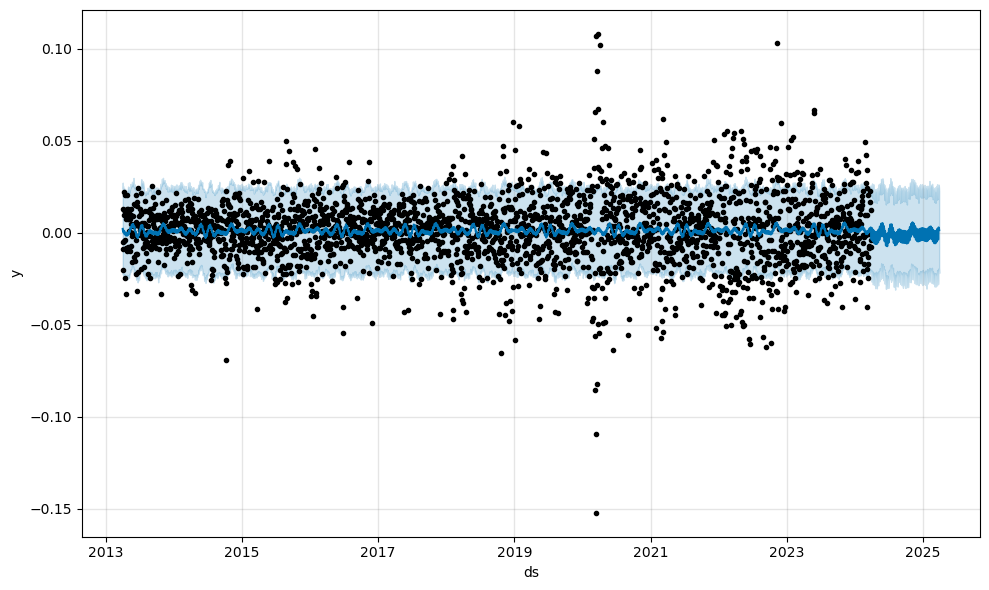

In [69]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Prepare the data for Prophet
prophet_df_soxx = daily_returns_df_soxx.reset_index().rename(columns={'Date': 'ds', 'Daily_Returns_SOXX': 'y'})

# Initialize the Prophet model
soxx_model = Prophet()
soxx_model.fit(prophet_df_soxx)

# Make future DataFrame for 1 year (365 days) for SOXX
future_soxx = soxx_model.make_future_dataframe(periods=365)

# Make predictions for SOXX
soxx_forecast = soxx_model.predict(future_soxx)

# Plot the predictions for SOXX
soxx_model.plot(soxx_forecast)
plt.show()

In [72]:
# Extract the forecasted values for the next one year
forecast_one_year = forecast_soxx[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(365)

# Display the DataFrame
forecast_one_year

,ds,yhat,yhat_lower,yhat_upper
2517,2023-03-29,127.453476,118.066603,137.126439
2518,2023-03-30,127.381971,118.126274,137.047613
2519,2023-03-31,127.196614,117.499201,136.148840
2520,2023-04-01,126.451741,117.076551,136.369608
2521,2023-04-02,126.347157,116.995367,136.010558
2522,2023-04-03,126.994014,117.118368,136.332099
2523,2023-04-04,126.884518,117.085649,136.774473
2524,2023-04-05,126.738038,117.410654,136.960464
2525,2023-04-06,126.619651,116.757344,135.846612
2526,2023-04-07,126.396085,116.934196,135.806702


In [70]:

import pandas as pd
import numpy as np  # Add this import
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler

def clean_extracted_features(features, missing_threshold=0.1, correlation_threshold=0.9):
    # 1. Remove low-variance features
    selector = VarianceThreshold(threshold=0.01)
    features_var_filtered = selector.fit_transform(features.fillna(0))
    
    # Convert back to DataFrame after VarianceThreshold (which outputs a NumPy array)
    features_var_filtered = pd.DataFrame(features_var_filtered, columns=features.columns[selector.get_support()])
    
    # 2. Handle missing values
    missing_counts = features_var_filtered.isnull().mean()
    features_no_missing = features_var_filtered.loc[:, missing_counts <= missing_threshold]
    
    # 3. Remove highly correlated features
    corr_matrix = features_no_missing.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > correlation_threshold)]
    features_low_correlation = features_no_missing.drop(columns=to_drop)
    
    # 4. Normalize/Scale features (optional)
    scaler = MinMaxScaler()
    features_scaled = pd.DataFrame(scaler.fit_transform(features_low_correlation), columns=features_low_correlation.columns)
    
    return features_scaled

# To use the function, ensure `extracted_features` is your DataFrame from tsfresh:
# cleaned_features = clean_extracted_features(extracted_features)
# print(cleaned_features)
# Assuming extracted_features is your DataFrame from tsfresh
cleaned_features = clean_extracted_features(extracted_features)

# Print the cleaned features
cleaned_features.describe()



,value__benford_correlation,"value__fft_coefficient__attr_""angle""__coeff_0"
count,2768.000000,2768.000000
mean,0.495152,0.446893
std,0.388255,0.497261
min,0.000000,0.000000
25%,0.130934,0.000000
50%,0.510567,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [71]:
# Extract the forecasted values for the next one year
forecast_one_year = forecast_soxx[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(365)

# Display the DataFrame
forecast_one_year

,ds,yhat,yhat_lower,yhat_upper
2517,2023-03-29,127.453476,118.066603,137.126439
2518,2023-03-30,127.381971,118.126274,137.047613
2519,2023-03-31,127.196614,117.499201,136.148840
2520,2023-04-01,126.451741,117.076551,136.369608
2521,2023-04-02,126.347157,116.995367,136.010558
2522,2023-04-03,126.994014,117.118368,136.332099
2523,2023-04-04,126.884518,117.085649,136.774473
2524,2023-04-05,126.738038,117.410654,136.960464
2525,2023-04-06,126.619651,116.757344,135.846612
2526,2023-04-07,126.396085,116.934196,135.806702
